# 交通事故理赔审核
## 本比赛为个人练习赛，适用于入门二元分类模型，主要针对于数据新人进行自我练习、自我提高，与大家切磋。

任务类型：二元分类

背景介绍:
在交通摩擦（事故）发生后，理赔员会前往现场勘察、采集信息，这些信息往往影响着车主是否能够得到保险公司的理赔。训练集数据包括理赔人员在现场对该事故方采集的36条信息，信息已经被编码，以及该事故方最终是否获得理赔。我们的任务是根据这36条信息预测该事故方没有被理赔的概率。   

数据文件（三个）：
train.csv 训练集，文件大小 15.6mb  
test.csv 预测集, 文件大小 6.1mb  
sample_submit.csv 提交示例 文件大小 1.4mb  


训练集中共有200000条样本，预测集中有80000条样本。

### 变量说明：  

|变量名| 解释  |  
|  :----:  | :----:  |  
|  CaseId  |  案例编号，没有实际意义  |  
| Q1  | 理赔员现场勘察采集的信息，Q1代表第一个问题的信息。信息被编码成数字，数字的大小不代表真实的关系。 |  
| Qk  | 同上，Qk代表第k个问题的信息。一共36个问题。 |    
|Evaluation|表示最终审核结果。0表示授予理赔，1表示未通过理赔审核。在test.csv中，这是需要被预测的标签|

In [1]:
# 读取数据
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
train = pd.read_csv('./train.csv')
validation = pd.read_csv('./test.csv')

### test数据目前不在我们的关注范围内，现阶段只分析train数据，首先对train数据进行分割成训练集和测试集。
### 对train数据进行观察与可视化

In [2]:
train.head(3)

,CaseId,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Evaluation
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
2,3,0,0,0,0,0,0,0,1,0,...,1,2,2,2,1,0,0,0,0,0


#### 去除Caseid，提取Evaluation

In [3]:
train = train.drop(columns='CaseId')
train.head(3)

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36,Evaluation
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,2,2,2,1,0,0,0,0,0


In [4]:
y = train['Evaluation']
x = train.drop(columns='Evaluation')
x[:3]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,1,2,2,2,1,0,0,0,0


### 统计各列分布

In [5]:
x.describe()
# 我们发现每一列不是0和1的关系

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q27,Q28,Q29,Q30,Q31,Q32,Q33,Q34,Q35,Q36
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000
mean,0.016445,0.010875,0.024925,0.038560,0.039130,0.080335,0.113725,0.294165,0.038810,0.192490,...,0.000820,0.611760,4.034760,1.163025,9.428990,0.979740,0.032945,0.005520,0.64946,0.657345
std,0.182496,0.141269,0.213645,0.263483,0.301528,0.508923,0.589884,0.916137,0.267851,0.681946,...,0.083901,0.984868,3.815101,0.616417,9.004402,0.238725,0.802953,0.074092,0.47714,0.474598
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,3.000000,1.000000,6.000000,1.000000,0.000000,0.000000,1.00000,1.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,5.000000,1.000000,14.000000,1.000000,0.000000,0.000000,1.00000,1.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,6.000000,6.000000,8.000000,4.000000,5.000000,...,14.000000,4.000000,52.000000,3.000000,42.000000,3.000000,38.000000,1.000000,1.00000,1.000000


In [6]:
x.Q1.value_counts() # 统计Q1列的频数

0    197959
1      1258
3       465
2       318
Name: Q1, dtype: int64

In [7]:
for i in x.columns:
    # print(i)
    print(x_train[i].value_counts()) # 得到所有列的值频数

NameError: name 'x_train' is not defined

In [8]:
y.value_counts()



0    168399
1     31601
Name: Evaluation, dtype: int64

# 主成分分析，降维

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 实例化一个pca
x2d = pca.fit_transform(x) # 应用到数据集,得到一个2维数据
pca.components_.T[:,0] # 查看第一个主成分向量矩阵

array([-8.34213622e-05,  3.28203884e-03,  2.76089533e-03,  2.05458466e-03,
        6.68098879e-03,  1.08955821e-02,  3.39455306e-03, -2.60856999e-02,
        1.57331906e-03, -7.91906683e-03,  1.33847013e-03,  2.97658708e-03,
        7.03660902e-04,  8.03645393e-04, -1.47521359e-03,  5.85441656e-03,
        2.93816616e-04,  6.60784314e-03, -1.14412668e-03,  1.27225555e-04,
       -1.14925454e-03,  1.81410244e-03, -2.81584490e-02, -4.65446779e-03,
       -9.46188854e-03, -2.51881708e-05, -1.49983814e-05,  2.87466221e-04,
        1.88696968e-04,  1.79892220e-03,  9.99023916e-01,  1.62302543e-04,
       -5.83822767e-04,  5.84731693e-05,  1.52413550e-03,  4.46929239e-05])

In [10]:
print(pca.explained_variance_ratio_) # 查看其中成分的贡献度

[0.71907012 0.13048653]


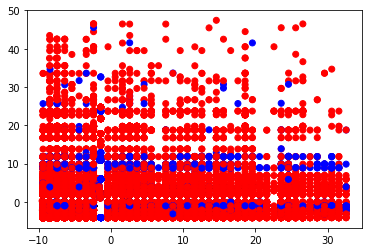

In [18]:
plt.scatter(x2d[:,0],x2d[:,1], c=y, marker="o", cmap="bwr_r")
plt.show() # 从结果看，pca无法把两类分开

### 因为该数据全部是因子类型，因此需要制作哑变量

In [12]:
x.info()
# get_dummies()能够自动转化object属性和category属性的列，int64的不会自动转换
# get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
#     Convert categorical variable into dummy/indicator variables
    
#     Parameters
#     ----------
#     data : array-like, Series, or DataFrame
#     prefix : string, list of strings, or dict of strings, default None
#         String to append DataFrame column names.
#         Pass a list with length equal to the number of columns
#         when calling get_dummies on a DataFrame. Alternatively, `prefix`
#         can be a dictionary mapping column names to prefixes.
#     columns : list-like, default None
#         Column names in the DataFrame to be encoded.
#         If `columns` is None then all the columns with
#         `object` or `category` dtype will be converted.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 36 columns):
Q1     200000 non-null int64
Q2     200000 non-null int64
Q3     200000 non-null int64
Q4     200000 non-null int64
Q5     200000 non-null int64
Q6     200000 non-null int64
Q7     200000 non-null int64
Q8     200000 non-null int64
Q9     200000 non-null int64
Q10    200000 non-null int64
Q11    200000 non-null int64
Q12    200000 non-null int64
Q13    200000 non-null int64
Q14    200000 non-null int64
Q15    200000 non-null int64
Q16    200000 non-null int64
Q17    200000 non-null int64
Q18    200000 non-null int64
Q19    200000 non-null int64
Q20    200000 non-null int64
Q21    200000 non-null int64
Q22    200000 non-null int64
Q23    200000 non-null int64
Q24    200000 non-null int64
Q25    200000 non-null int64
Q26    200000 non-null int64
Q27    200000 non-null int64
Q28    200000 non-null int64
Q29    200000 non-null int64
Q30    200000 non-null int64
Q31    200000 non-n

In [13]:
dump_x = pd.get_dummies(x,prefix = x.columns,columns = x.columns)
dump_x[:3] # 全部转化为哑变量

,Q1_0,Q1_1,Q1_2,Q1_3,Q2_0,Q2_1,Q2_2,Q2_3,Q3_0,Q3_1,...,Q33_35,Q33_36,Q33_37,Q33_38,Q34_0,Q34_1,Q35_0,Q35_1,Q36_0,Q36_1
0,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
1,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0
2,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,1,0,1,0


In [14]:
from sklearn.model_selection import train_test_split
# help(train_test_split)
x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.2 , random_state = 1)

# Sklearn线性模型拟合

In [15]:
from sklearn import linear_model
reg = linear_model.LinearRegression() # 实例化
reg.fit(x_train,y_train) # fit()数据

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [16]:
reg.coef_

array([-3.20960192e-02, -5.70398909e-02, -4.46830827e-02,  9.08015889e-03,
       -6.10284127e-02, -1.73754473e-02, -3.15323247e-03,  2.50799588e-03,
       -2.81169139e-02, -3.75583127e-03, -2.06183367e-02,  5.81391467e-02,
        6.69586076e-02, -1.52695276e-02, -4.69660500e-02, -2.44144608e-02,
       -2.73300792e-02, -2.63637311e-02,  2.37616310e-02,  2.30084013e-01,
       -4.28178721e-02, -3.23759293e-02,  2.22146188e-04, -6.01023289e-03,
       -4.28785575e-03, -6.05547383e-02,  1.88375099e-02,  1.13528169e-01,
       -1.45845048e-02,  1.26576423e-01,  1.18459941e-03, -6.44201619e-02,
        2.51239941e-02,  8.47772622e-01, -3.34238794e-01,  5.56547772e-01])

# 计算误差

In [17]:
y_pred = reg.predict(x_test)